Demo to upsample a signal using the frequency domain LPF technique

Phase plots are an attempt to clean up noise in phase spectra by way of a threhold.

In [ ]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

20 1001


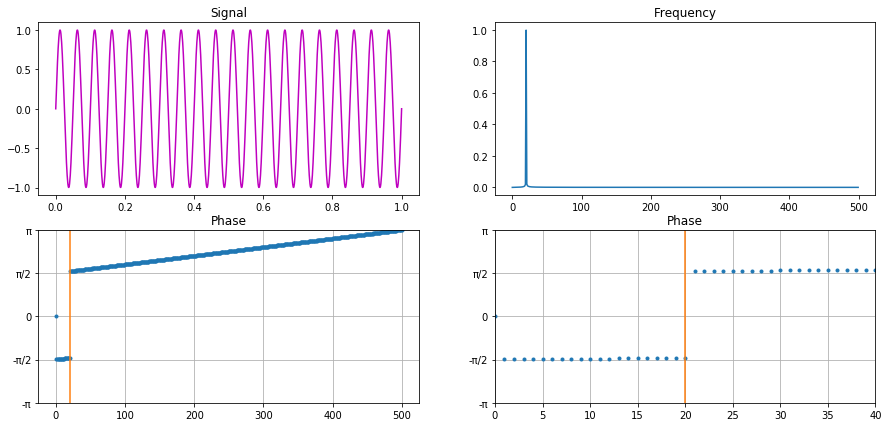

In [66]:


#Generate synthetic signal
t=np.linspace(0,1000,1001)
y=np.zeros(len(t))
dt = 0.001
frequency=20
for i in range(0,len(t)):
    w= 2.*np.pi*frequency
    y[i] = np.sin(w*t[i]*dt) #* np.sin(w*t[i]) 
    #y[i]=np.sin((2.*np.pi*t[i]))*np.cos((2.*np.pi*t[i]))
    #print 2.*np.pi*t[i]

savesignal=y #save for comparing with resampled signal
savet=t

plt.subplot(2,2,1)
plt.plot(t*dt,y,'m')
#plt.plot([0,len(t)*dt],[0.,0.])
plt.title('Signal')

yfft=np.fft.fft(y)
yfftsave0=yfft
n = yfft.size
yfft=yfft/yfft.size*2 #scale by 1/N * 2 as per https://dsp.stackexchange.com/questions/20500/negative-values-of-the-fft
freq = np.fft.fftfreq(n, d=dt)
freqsave0=freq
#freq = np.fft.fftshift(freq)

plt.subplot(2,2,2)
plt.plot((freq[:int(n/2+1)]),np.abs(yfft)[:int(n/2+1)])
plt.title('Frequency')
print  (np.argmax(abs(yfft)),n)
#print([print(f) for f in freq])
phase=np.arctan2(np.imag(yfft),np.real(yfft))
#phase=np.arctan2([x if x > 1E-3 else 0 for x in np.imag(yfft)],[x if x > 1E-5 else 0 for x in np.real(yfft)])
#print([x if x > 1E-3 else 0 for x in np.imag(yfft)])
#print([(f,'{:.5E}'.format(i)) for f,i in zip(freq,np.real(yfft))])
#print([(f,'{:.5E}'.format(i)) for f,i in zip(freq,np.imag(yfft))])
plt.subplot(2,2,3)
plt.plot(freq[:int(n/2+1)],phase[:int(n/2+1)],'.')
plt.title('Phase')
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.grid()

plt.subplot(2,2,4)
plt.plot(freq[:int(n/2+1)],phase[:int(n/2+1)],'.')
plt.title('Phase')
# explanation on phase for frequencies other than the frequency of interest (20Hz)
# https://stackoverflow.com/questions/56543190/phase-spectrum-with-python-and-fft
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.xlim([0,frequency*2])
plt.ylim([-np.pi,np.pi])
# how to plot y axis in multiples of pi
#https://stackoverflow.com/questions/64553490/how-to-change-axes-labels-to-multiples-of-pi
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.grid()
plt.show()




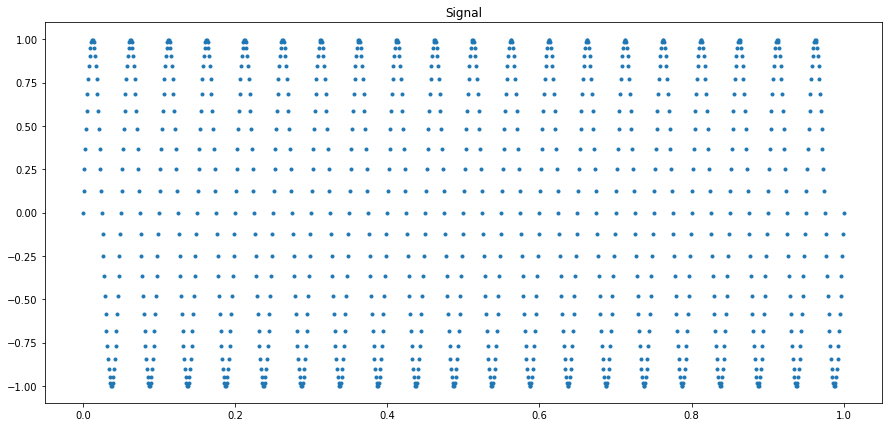

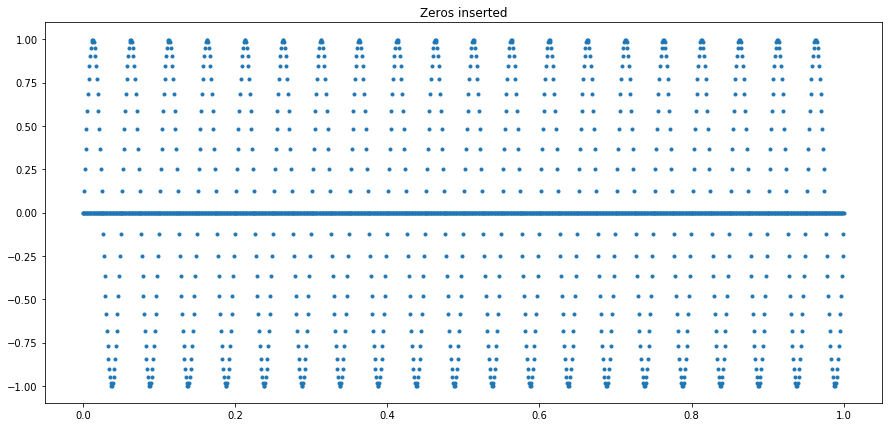

2001


In [67]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#Generate synthetic signal
t0=np.linspace(0,1000,1001)
y=np.zeros(len(t0))
dt = 0.001
frequency=20
for i in range(0,len(t0)):
    w= 2.*np.pi*frequency
    y[i] = np.sin(w*t0[i]*dt) #* np.sin(w*t[i]) 
    #y[i]=np.sin((2.*np.pi*t[i]))*np.cos((2.*np.pi*t[i]))
    #print 2.*np.pi*t[i]

#insert zeros between samples
yup=np.zeros(len(t0)*2-1)
t=np.linspace(0,1000,2002-1)
k=0
for i in range(1,len(yup),2):
    yup[i]=y[k]  #np.sin(np.radians(2.*np.pi*t[i]))*np.cos(np.radians(2.*np.pi*t[i]))
    k+=1

plt.plot(t0*dt,y,'.')
plt.title('Signal')
plt.show()
plt.plot(t*dt,yup,'.')
plt.title('Zeros inserted')
#plt.plot([0,len(t)*dt/2.],[0.,0.])
plt.show()
print(len(t))

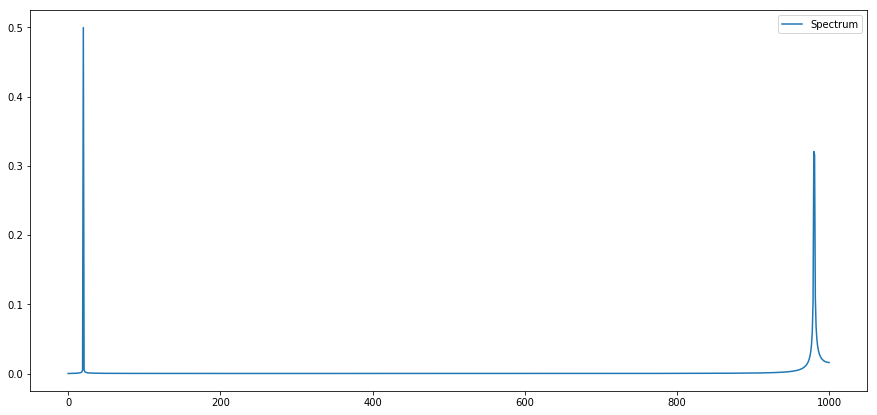

2001
2001


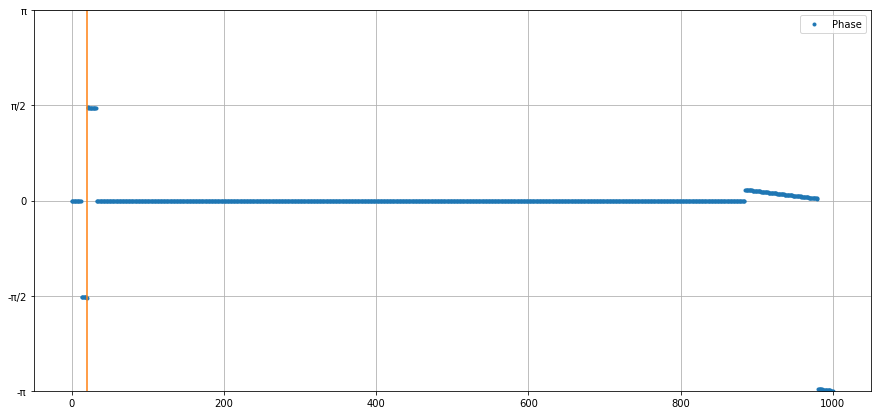

2001


In [75]:
#now take fft of sythetic (with inserted zeroes)
import numpy as np
yfft=np.fft.fft(yup)
yfftsave1=yfft
n = yfft.size
yfft=yfft/yfft.size*2
freq = np.fft.fftfreq(n, d=dt/2)   # <=== dt/2 because we've gone from 0.001 to 0.0005
#freq = np.fft.fftshift(freq)
plt.plot((freq)[:int(n/2+1)],np.abs(yfft)[:int(n/2+1)], label='Spectrum')
plt.legend(loc='best')
plt.show()
print (len(yfft))
print (len(freq))

threshold = max(abs(yfft))/1000
yfftphase = yfft
yfftphase[abs(yfft) < threshold] = 0
phase=np.arctan2(np.imag(yfftphase),np.real(yfftphase))
plt.plot((freq)[:int(n/2+1)],phase[:int(n/2+1)],'.',label='Phase')
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.legend()
plt.grid()
plt.show()
print(n)

2001


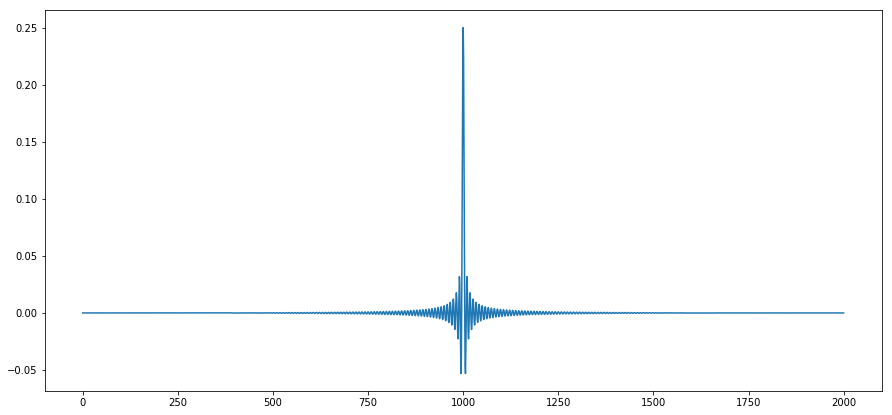

In [69]:
#construct low pass filter to pass from 0->f*Nyq Hz
numtaps = 2001
print (yup.size)
f = 0.25
filt=sp.firwin(numtaps, f, window='blackman')
plt.plot(filt)
plt.show()

-0.012560090569074705 -0.009420067926805971 7.9960019990005 5.997001499250375
slope: -0.09000000000000218
-0.011111111111110843


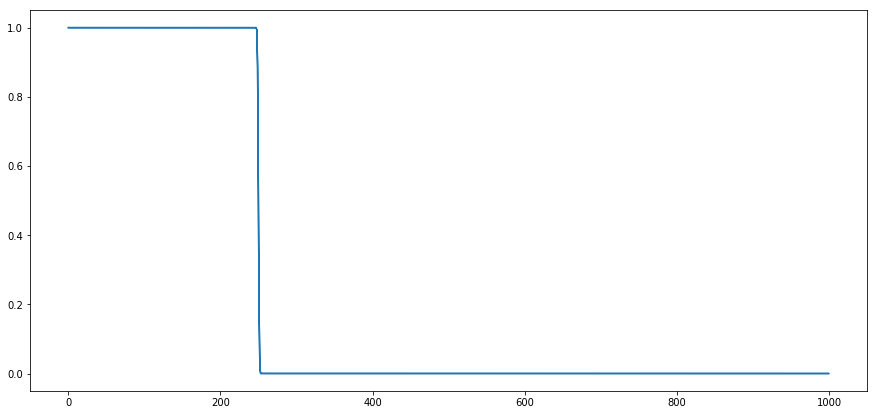

In [70]:
#now take fft of LPF
yfft=np.fft.fft(filt)
yfftsave2=yfft
n = yfft.size
freq = np.fft.fftfreq(n, d=dt/2) # <=== dt/2 because we've gone from 0.001 to 0.0005
plt.plot(abs(freq),np.abs(yfft))
plt.show
#plt.close()
phase=np.arctan2(-np.imag(yfft),np.real(yfft))
#plt.plot((freq),phase,'x')
m=np.degrees((phase[8]-phase[6]))/(freq[8]-freq[6])
print (phase[8], phase [6], freq[8], freq[6])
print ('slope:', m)
print (1./m * 0.001)
plt.show()

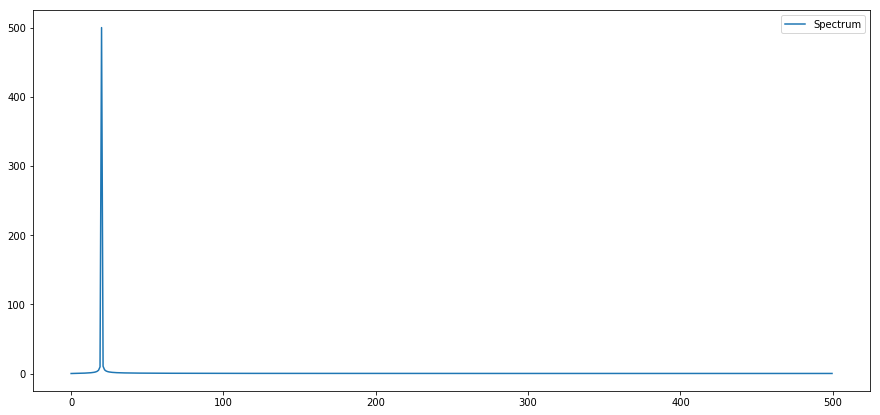

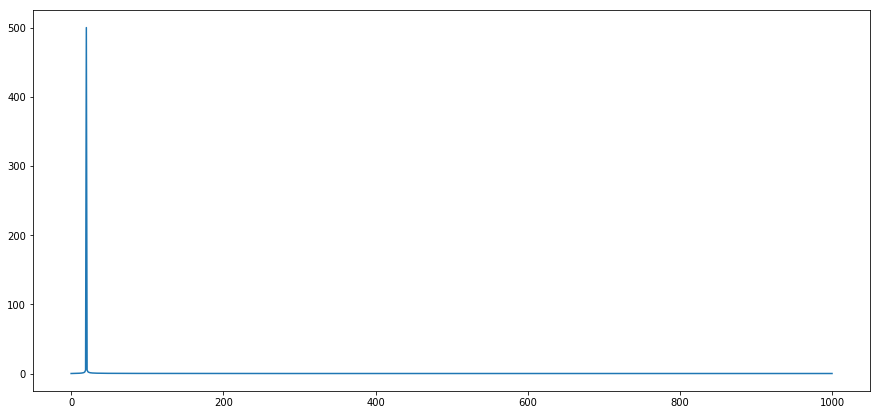

2001 2001


In [72]:
#convolve filter with zeroed signal in frequency domain
lpfiltered=np.zeros(len(yfft),np.complex) ##!! needs complex array
for i in range(0,len(yfft)):
    lpfiltered[i]=yfftsave1[i]*yfftsave2[i]
n = lpfiltered.size	

#lpfiltered=lpfiltered/yfftsave0.size*2  #normalise amps to original signal spectrum
plt.plot((freqsave0)[:int(yfftsave0.size/2+1)],np.abs(yfftsave0)[:int(yfftsave0.size/2+1)], label='Spectrum')
plt.legend(loc='best')
plt.show()

freq = np.fft.fftfreq(n, d=dt/2)
plt.plot((freq)[:int(n/2+1)],np.abs(lpfiltered)[:int(n/2+1)])
plt.show()
print (len(t),len(np.real(np.fft.ifft(lpfiltered))))



New Signal Length: 2001
New dt: 0.0005
2001


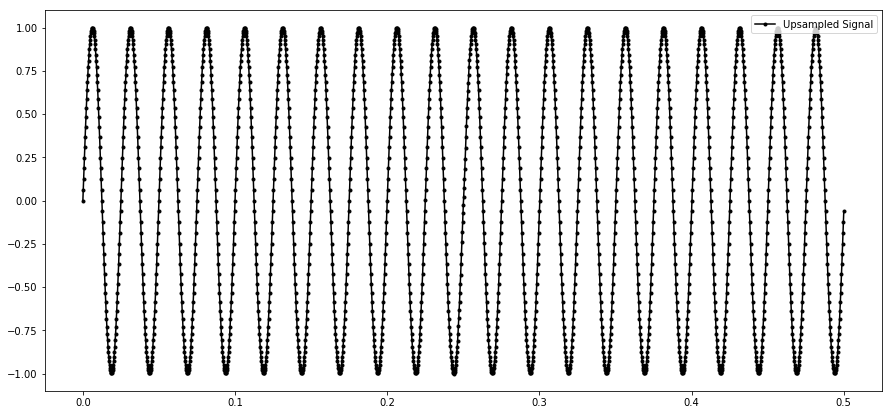

Old Signal Length: 1001
Old dt: 0.001


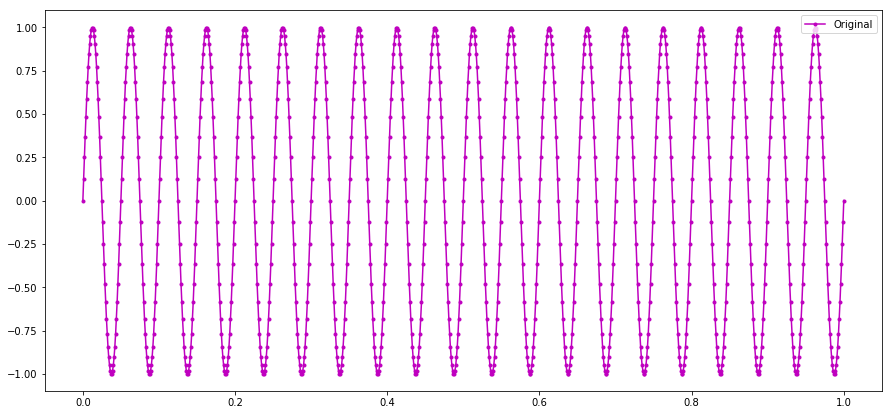

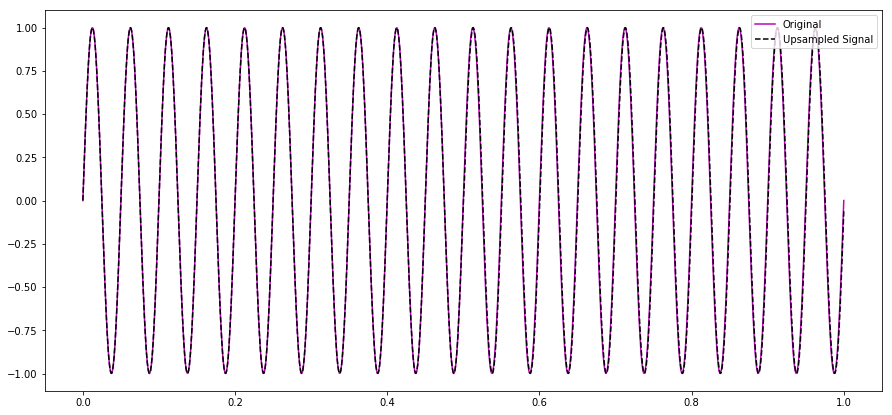

2001 2001 1001 1001


In [73]:
#plot Time domain signal after LPfiltering 

yupsampled=np.real(np.fft.ifft(lpfiltered))
yupsampled=yupsampled/max(yupsampled)  #normalise time domain signal for comparison
print ('New Signal Length:',yupsampled.size)
newdt=dt/2
print ('New dt:', newdt)
print(len(t))
plt.plot(t*newdt,yupsampled,'k.-',label='Upsampled Signal')
plt.legend(loc="upper right")
plt.show()

#plot original signal for comparison with filtered signal
print ('Old Signal Length:',savesignal.size)
print ('Old dt:', dt)
plt.plot(savet*dt,savesignal,'m.-',label='Original')
#plt.plot([0,len(t)*dt],[0.,0.])
plt.legend(loc="upper right")
plt.show()

#compare signals on same plot
plt.plot(savet*dt,savesignal,'m-',label='Original')
plt.plot(t*dt,yupsampled,'k--',label='Upsampled Signal')
plt.legend(loc="upper right")
plt.show()


print (yupsampled.size,yup.size,y.size,savesignal.size)
#plt.plot(t*newdt,np.subtract(yupsampled,yup),'+')
#plt.show()

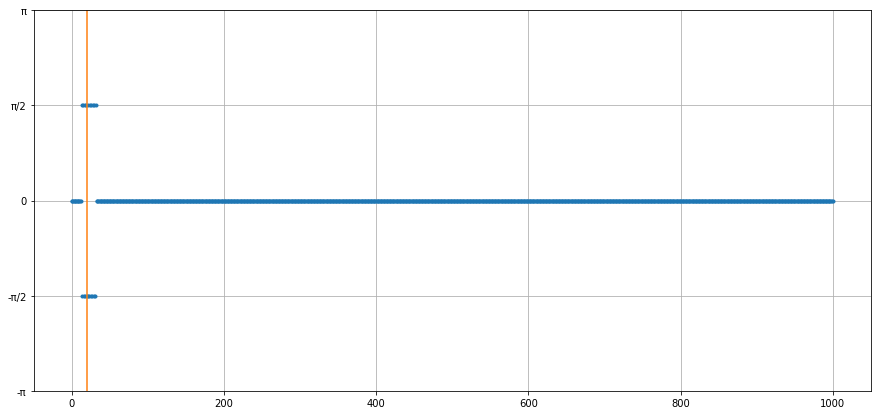

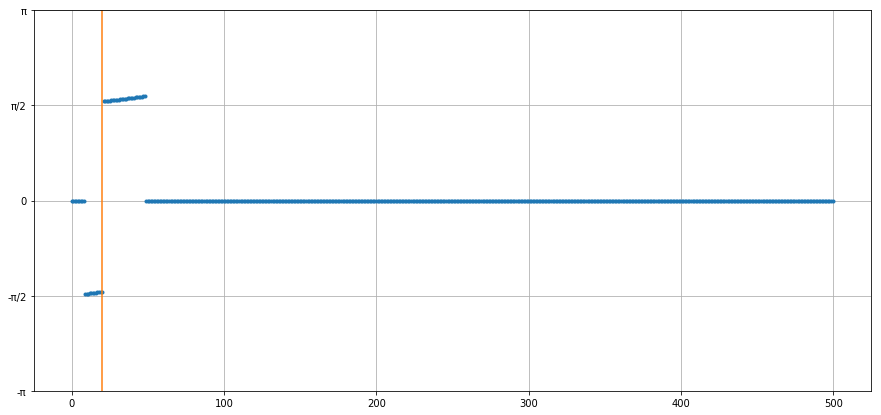

In [74]:
#plot filtered signal phase 

threshold = max(abs(lpfiltered))/1000
saveresult = lpfiltered
saveresult[abs(lpfiltered) < threshold] = 0
phase=np.arctan2(np.imag(saveresult),np.real(saveresult))
plt.plot((freq[:int(saveresult.size/2+1)]),phase[:int(saveresult.size/2+1)],'.')
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.grid()
plt.show()

threshold = max(abs(yfftsave0))/1000
yfftsave0[abs(yfftsave0) < threshold] = 0
phase=np.arctan2(np.imag(yfftsave0),np.real(yfftsave0))
plt.plot((freqsave0[:int(yfftsave0.size/2+1)]),phase[:int(yfftsave0.size/2+1)],'.')
plt.plot([frequency,frequency],[-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/2, step=(np.pi/2)), ['-π','-π/2','0','π/2','π'])
plt.grid()
plt.show()